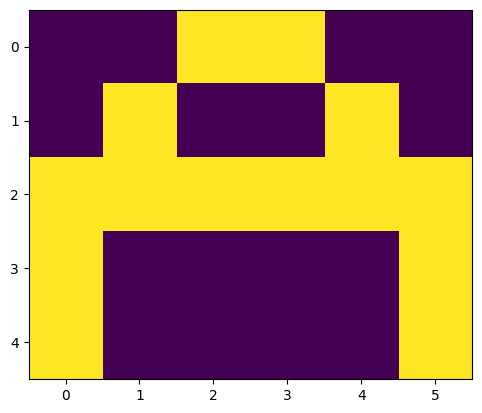

------------------------------------
[array([[0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
        0, 1, 1, 0, 0, 0, 0, 1]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 0]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 1, 1, 1, 1, 0]])] 

 [[1 0 0]
 [0 1 0]
 [0 0 1]]


In [3]:
# data set

# A
a = [0, 0, 1, 1, 0, 0,
     0, 1, 0, 0, 1, 0,
     1, 1, 1, 1, 1, 1,
     1, 0, 0, 0, 0, 1,
     1, 0, 0, 0, 0, 1]

# B
b = [0, 1, 1, 1, 1, 0,
     0, 1, 0, 0, 1, 0,
     0, 1, 1, 1, 1, 0,
     0, 1, 0, 0, 1, 0,
     0, 1, 1, 1, 1, 0]

# C
c = [0, 1, 1, 1, 1, 0,
     0, 1, 0, 0, 0, 0,
     0, 1, 0, 0, 0, 0,
     0, 1, 0, 0, 0, 0,
     0, 1, 1, 1, 1, 0]

# create label
y = [[1,0,0],
     [0,1,0],
     [0,0,1]]

import numpy as np
import matplotlib.pyplot as plt

#visualise data
plt.imshow(np.array(a).reshape(5,6))
plt.show()

print("------------------------------------")

# convert data and label into numpy array
x = [np.array(a).reshape(1,30), np.array(b).reshape(1,30), np.array(c).reshape(1,30)]
y = np.array(y)

print(x, "\n\n", y)

In [4]:
# activation function
def sigmoid(x):
    return (1/(1+np.exp(-x)))

In [5]:
# creating feed forward NN
def f_forward(x,w1, w2):
    #hidden layer
    z1 = x.dot(w1)
    a1 = sigmoid(z1)

    #output layer
    z2 = a1.dot(w2)
    a2 = sigmoid(z2)
    return(a2)

In [6]:
# initialize the weights
def generate_wt(x,y):
    l = []
    for i in range(x*y):
        l.append(np.random.randn())
    return(np.array(l).reshape(x,y))

def loss(out, y):
    s = (np.square(out-y))
    s = np.sum(s)/len(y)
    return(s)

In [7]:
def back_prop(x,y,w1,w2,aplha):
    #hidden
    z1 = x.dot(w1)
    a1 = sigmoid(z1)

    # output layer
    z2 = a1.dot(w2)
    a2 = sigmoid(z2)

    d2 = (a2-y)
    d1 = np.multiply((w2.dot(d2.T)).T, np.multiply(a1, 1 - a1))  # ✅ fixed

    #gradient
    w1_adj = x.transpose().dot(d1)
    w2_adj = a1.transpose().dot(d2)

    w1 = w1 - (aplha*(w1_adj))
    w2 = w2 - (aplha*(w2_adj))

    return(w1,w2)

In [8]:
def train(x,y,w1,w2, alpha=0.01, epoch =10):
    acc = []
    loss_list = []
    for i in range(epoch):
        l = []
        for j in range(len(x)):
            out = f_forward(x[j], w1, w2)  # ✅ fixed
            l.append((loss(out, y[j])))
            w1,w2 = back_prop(x[j], y[j], w1,w2, alpha)
        print("Epochs:", j+1, "acc:", (1-(sum(l)/len(x)))*100)
        acc.append((1-sum(l)/len(x))*100)
        loss_list.append(sum(l)/len(x))
    return(acc,loss_list,w1,w2)

In [9]:
def predict(x,w1,w2):
    out = f_forward(x,w1,w2)
    maxm =0
    k=0
    for i in range(len(out[0])):
        if(maxm<out[0][i]):
            maxm = out[0][i]
            k = i
    if(k == 0):
        print("image is of letter A")
    elif (k==1):
        print("image is of letter B")
    else:
        print("image is of letter C")
    plt.imshow(x.reshape(5,6))
    plt.show()

In [10]:
w1 = generate_wt(30,5)
w2 = generate_wt(5,3)
print(w1,w2)

acc, loss, w1,w2 = train(x,y,w1,w2,0.1,100)

[[-0.5203868   1.18981675 -0.57616505  0.7348825   0.71220757]
 [ 1.37821749 -0.77416626 -0.81312469  0.17406912 -1.19201609]
 [-0.14852087  0.65156724  1.00418496  0.08507379 -1.10227468]
 [ 0.46083803  2.1163459  -0.14011513 -1.58884785 -0.45910681]
 [ 2.6048892  -0.09423512 -0.11662292  0.0252605  -0.71037788]
 [ 0.0288019   0.83441799 -0.53690729 -1.3882469  -0.3020557 ]
 [-1.24357612  0.25758747 -1.61309433  0.73455007 -0.72245084]
 [-0.37756516 -0.45805078  0.1133063  -1.90467543 -0.24657055]
 [-0.16546976  0.25534737 -1.07835198 -2.45680993  1.626272  ]
 [ 1.07096738  1.15511194  0.18101838 -0.06528416  0.64415568]
 [-0.16182715  1.08120535  0.04014373  0.26721752 -2.46903203]
 [ 1.48265948  0.81891146 -0.60725075  0.30412188  0.27847971]
 [-1.16337157  0.15324193 -2.01262637  0.79856844  0.60891161]
 [ 0.81026231 -0.92922407  0.84251908  0.19337804 -1.96438297]
 [ 0.10086088 -0.02399643 -0.91170026 -0.46943138  0.03538482]
 [ 0.82990766  0.04456578  0.75246722  0.56845787  0.17

image is of letter A


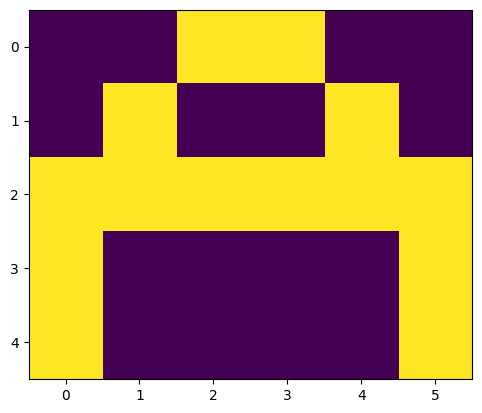

In [11]:
# Predict one sample
predict(x[0], w1, w2)

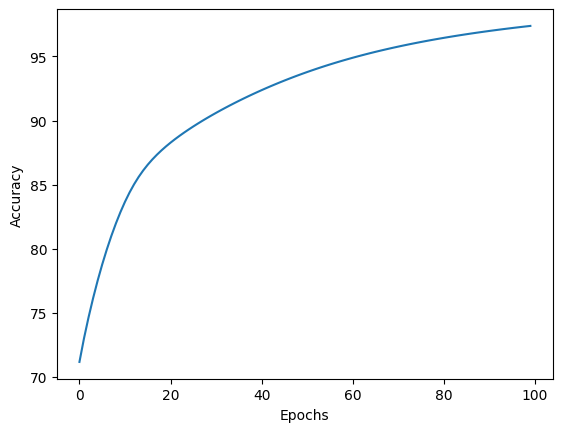

In [12]:
import matplotlib.pyplot as plt1

#plotting accuracy
plt1.plot(acc)
plt1.ylabel('Accuracy')
plt1.xlabel('Epochs')
plt1.show()

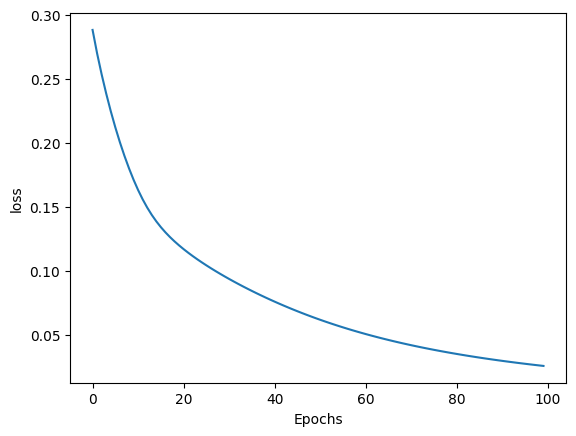

In [13]:
# plot loss
plt1.plot(loss)
plt1.ylabel('loss')
plt1.xlabel('Epochs')
plt1.show()

In [14]:
print(w1, "\n" , w2)

[[-5.20386802e-01  1.18981675e+00 -5.76165052e-01  7.34882496e-01
   7.12207571e-01]
 [ 1.43674698e+00 -9.12045909e-01 -9.54360343e-01  3.28739750e-01
  -1.18832371e+00]
 [-2.67817104e-01  6.54915825e-01  7.25784603e-01 -1.81497092e-02
  -1.14295872e+00]
 [ 3.41541797e-01  2.11969449e+00 -4.18515493e-01 -1.69207135e+00
  -4.99790852e-01]
 [ 2.66341869e+00 -2.32114778e-01 -2.57858573e-01  1.79931129e-01
  -7.06685500e-01]
 [ 2.88019013e-02  8.34417986e-01 -5.36907289e-01 -1.38824690e+00
  -3.02055700e-01]
 [-1.24357612e+00  2.57587469e-01 -1.61309433e+00  7.34550071e-01
  -7.22450842e-01]
 [-4.96861394e-01 -4.54702186e-01 -1.65094061e-01 -2.00789893e+00
  -2.87254595e-01]
 [-1.65469758e-01  2.55347369e-01 -1.07835198e+00 -2.45680993e+00
   1.62627200e+00]
 [ 1.07096738e+00  1.15511194e+00  1.81018379e-01 -6.52841565e-02
   6.44155675e-01]
 [-4.15294693e-01  1.03526606e+00 -2.93909306e-02  9.52344359e-01
  -2.51349210e+00]
 [ 1.48265948e+00  8.18911459e-01 -6.07250748e-01  3.04121885e-01

image is of letter B


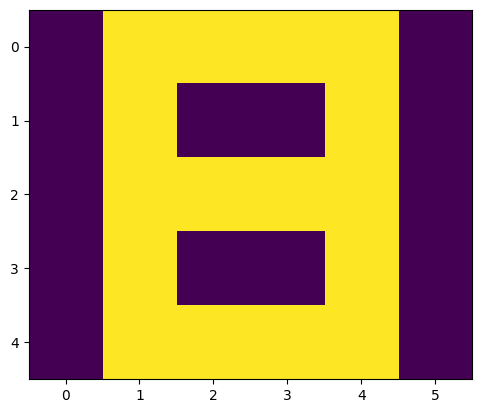

In [15]:
# 0-a, 1-b , 2-c
predict(x[1], w1,w2)

image is of letter A


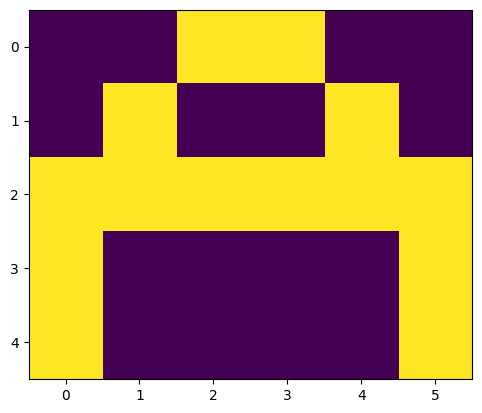

In [16]:
predict(x[0], w1,w2)

image is of letter C


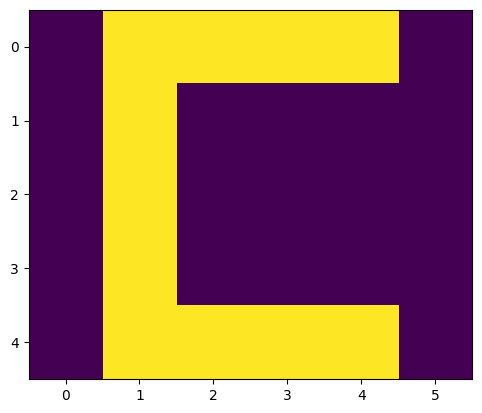

In [17]:
predict(x[2], w1,w2)